# Imports

Import the necessary libraries for data wrangling and visualisation

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.set_context('paper')

Import machine learning models and evaluation tools

In [2]:
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from xgboost import XGBClassifier

# Read training and test data

Import CSV files

In [3]:
train_data = pd.read_csv("../input/titanic/train.csv")
test_data = pd.read_csv("../input/titanic/test.csv")
submission=pd.read_csv("../input/titanic/gender_submission.csv")

print(test_data.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


Examine the training data:

Look at the top and base of the data, the data types, and for null values

In [4]:
train_columns = train_data.columns
train_index = train_data.index

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Can see a few null values in the cabin column already

Examine the number of each data type

In [6]:
data_types = train_data.dtypes.reset_index()
data_types.columns = ['Count', 'Dtype']
data_types.groupby('Dtype').aggregate('count').reset_index()

,Dtype,Count
0,int64,5
1,float64,2
2,object,5


# Exploratory Data Analysis 
Visualising and analysing the data to extract insights. We want to summarise important characteristics and trends in our data in order to better understand our dataset and relationships within it.

**Categorical Features:**
Within categorical features are the values nominal, ordinal, ratio, or interval based? This helps us select the appropriate plots for visualization.

**Numerical Features:**
Within numerical features are the values discrete, continuous, or timeseries based?

In [7]:
print(train_columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
train_data.info()
print('-'*40)
test_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [9]:
print(f'Train_data is : {train_data.shape}')
print(' '*27)
print(f'Test_data is : {test_data.shape}')

Train_data is : (891, 12)
                           
Test_data is : (418, 11)


In [10]:
print(train_data.describe(include="all")) 

        PassengerId    Survived      Pclass                        Name   Sex  \
count    891.000000  891.000000  891.000000                         891   891   
unique          NaN         NaN         NaN                         891     2   
top             NaN         NaN         NaN  Cameron, Miss. Clear Annie  male   
freq            NaN         NaN         NaN                           1   577   
mean     446.000000    0.383838    2.308642                         NaN   NaN   
std      257.353842    0.486592    0.836071                         NaN   NaN   
min        1.000000    0.000000    1.000000                         NaN   NaN   
25%      223.500000    0.000000    2.000000                         NaN   NaN   
50%      446.000000    0.000000    3.000000                         NaN   NaN   
75%      668.500000    1.000000    3.000000                         NaN   NaN   
max      891.000000    1.000000    3.000000                         NaN   NaN   

               Age       Si

Names are unique across the entire dataset.

Cabin has several duplicates (147 unique values in 204) across the dataset and a signifcant number of missing values.

Age has multiple missing values. 

Embarked has two missing values. 

In [11]:
# Check the number of unique values in the numerical data, will help create useful visulatisations
unique_values = pd.DataFrame.from_records([(col, train_data[col].nunique()) for col in train_data.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
print(unique_values)

    Column_Name  Num_Unique
1      Survived           2
4           Sex           2
2        Pclass           3
11     Embarked           3
6         SibSp           7
7         Parch           7
5           Age          88
10        Cabin         147
9          Fare         248
8        Ticket         681
0   PassengerId         891
3          Name         891


**Analyse data by comparing the relationship between features**

Examine whether Pclass, Sex, Embarked, and SibSp impact survival rate. 

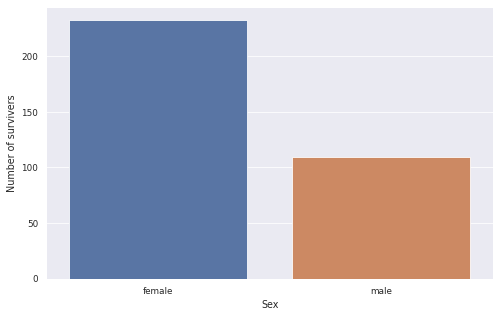

In [12]:
# Examine the infuence of sex and embarked on survived (=1)
train_data.groupby('Sex')['Survived'].count()
# Visualise the number of survivers
ax = sns.countplot(data=train_data[train_data['Survived'] == 1], x='Sex')
ax.set_ylabel("Number of survivers")
plt.show()

In [13]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [16]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


# Visualise Data

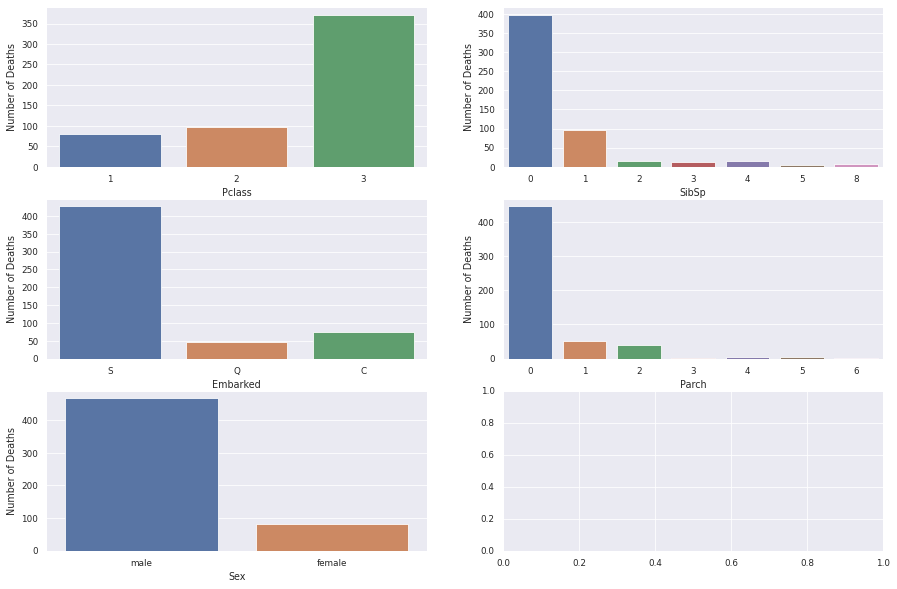

In [17]:
# View categorical feature relationship to deaths
features = ['Pclass', 'SibSp', 'Embarked', 'Parch', 'Sex']
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for var, subplot in zip(features, ax.flatten()):
    sns.countplot(x=var, data=train_data[train_data['Survived'] == 0], ax=subplot)
    subplot.set_ylabel("Number of Deaths")
plt.show()

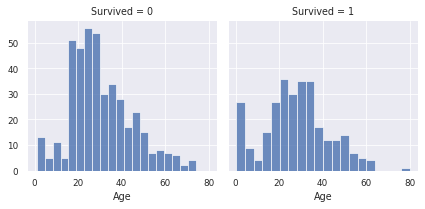

In [18]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20, alpha=0.8)

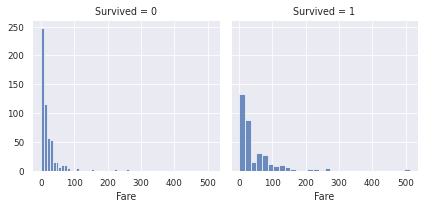

In [19]:
gr = sns.FacetGrid(train_data, col='Survived')
gr.map(plt.hist, 'Fare', bins=30, alpha=0.8)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


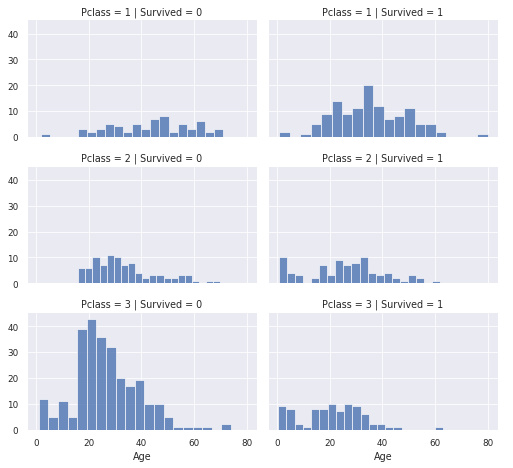

In [20]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.8, bins=20)
grid.add_legend();

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


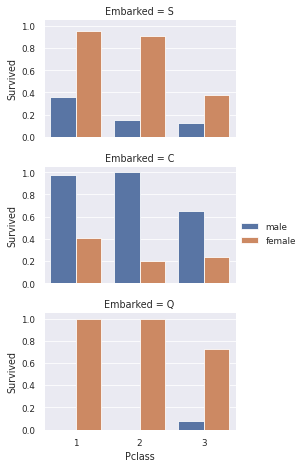

In [21]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Pclass', 'Survived', 'Sex', ci=None, palette='deep')
grid.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


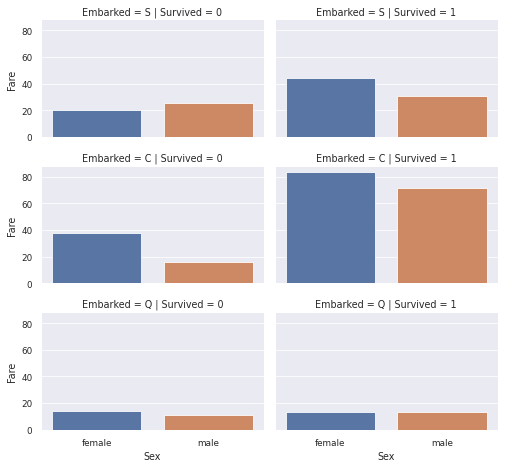

In [22]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', ci=None, palette='deep')
grid.add_legend()

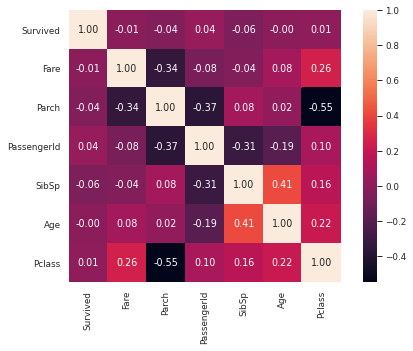

In [23]:
corr_matrix = train_data.corr(method='pearson')
attrib = corr_matrix.nlargest(len(corr_matrix), 'Survived').index
sns.heatmap(corr_matrix, annot=True, cbar=True, square=True, 
            fmt='.2f', yticklabels=attrib.values, xticklabels=attrib.values)
plt.show()

# Create new features 

Names, which is currently unique across the dataset, can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In [24]:
train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)
data = [train_data, test_data]

print(f"Train data shapes: {data[0].shape}")
print(f"Train data shapes: {data[1].shape}")

Train data shapes: (891, 10)
Train data shapes: (418, 9)


In [25]:
for dataset in data:
    dataset['Prefix'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
print(train_data[['Prefix', 'Survived']].groupby('Prefix').aggregate('count').reset_index())

      Prefix  Survived
0       Capt         1
1        Col         2
2   Countess         1
3        Don         1
4         Dr         7
5   Jonkheer         1
6       Lady         1
7      Major         2
8     Master        40
9       Miss       182
10      Mlle         2
11       Mme         1
12        Mr       517
13       Mrs       125
14        Ms         1
15       Rev         6
16       Sir         1


In [26]:
for dataset in data:
    dataset['Prefix'] = dataset['Prefix'].replace('Mlle', 'Miss')
    dataset['Prefix'] = dataset['Prefix'].replace('Ms', 'Miss')
    dataset['Prefix'] = dataset['Prefix'].replace('Mme', 'Mrs')
    dataset['Prefix'] = dataset['Prefix'].replace(['Lady', 'Countess','Capt', 
                                             'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 
                                             'Jonkheer', 'Dona'], 'Unknown')

print(train_data[['Prefix', 'Survived']].groupby('Prefix').aggregate('count').reset_index())
print('-'*20)
print(train_data[['Prefix', 'Survived']].groupby(['Prefix'], as_index=False).mean())

    Prefix  Survived
0   Master        40
1     Miss       185
2       Mr       517
3      Mrs       126
4  Unknown        23
--------------------
    Prefix  Survived
0   Master  0.575000
1     Miss  0.702703
2       Mr  0.156673
3      Mrs  0.793651
4  Unknown  0.347826


In [27]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Unknown": 5}
for dataset in data:
    dataset['Prefix'] = dataset['Prefix'].map(title_mapping)
    dataset['Prefix'] = dataset['Prefix'].fillna(0)

train_data['Prefix'].value_counts()

1    517
2    185
3    126
4     40
5     23
Name: Prefix, dtype: int64

We can now remove the Name columns from the test and train datasets and make the PassengerID the index

In [28]:
train_data = train_data.drop(["Name"], axis=1)
test_data = test_data.drop(["Name"], axis=1)
train_data.set_index('PassengerId', inplace=True)

In [29]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1
2,1,1,female,38.0,1,0,71.2833,C,3
3,1,3,female,26.0,0,0,7.9250,S,2
4,1,1,female,35.0,1,0,53.1000,S,3
5,0,3,male,35.0,0,0,8.0500,S,1


**Create new features:**

Transforming continuous numeric features into a discrete number of bands:

* Age 
* Fare

In [30]:
# Fill Age NaN's
median_age = train_data['Age'].median() 
train_data['Age'].fillna(median_age, inplace=True) # fill with median age 
# Fill test NaN'S
med_age = test_data['Age'].median() 
test_data['Age'].fillna(med_age, inplace=True) # fill with median age 

# Cut age into 6 discrete bands 
train_data['AgeCat'] = pd.cut(train_data['Age'], 6)
train_data[['AgeCat', 'Survived']].groupby(['AgeCat'], as_index=False).mean().sort_values(by='AgeCat', ascending=True)

,AgeCat,Survived
0,"(0.34, 13.683]",0.591549
1,"(13.683, 26.947]",0.354839
2,"(26.947, 40.21]",0.372038
3,"(40.21, 53.473]",0.390000
4,"(53.473, 66.737]",0.348837
5,"(66.737, 80.0]",0.142857


Replace age with ordinal categories.


In [31]:
category = pd.cut(train_data['Age'], bins=[0, 14, 27, 40, 53, 67, 99], labels=[0, 1, 2, 3, 4, 5])
train_data.insert(5, 'AgeOrd', category)
# drop AgeCat
train_data = train_data.drop(['AgeCat','Age'], axis=1)

cat = pd.cut(test_data['Age'], bins=[0, 14, 27, 40, 53, 67, 99], labels=[0, 1, 2, 3, 4, 5])
test_data.insert(5, 'AgeOrd', cat)
test_data = test_data.drop(['Age'], axis=1)

View the relationship between fare categories and survival. 

Fare has a very tail heavy scew. 

In [32]:
# Cut Fare into 4 discrete bands; use qcut to account for tr
train_data['FareCat'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareCat', 'Survived']].groupby(['FareCat'], as_index=False).mean().sort_values(by='FareCat', ascending=True)

,FareCat,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [33]:
cats = pd.cut(train_data['Fare'], bins=[-0.001, 8, 15, 31, 999], labels=[0, 1, 2, 3])
train_data.insert(5, 'FareDiscr', cats)
train_data = train_data.drop(['FareCat', 'Fare'], axis=1)

In [34]:
categ = pd.cut(test_data['Fare'], bins=[0, 8, 15, 31, 999], labels=[0, 1, 2, 3])
test_data.insert(5, 'FareDiscr', categ)
test_data = test_data.drop(['Fare'], axis=1)

***Combining Parch and Sibsp to create a variable for the number of relatives on board.***

sibsp: number of siblings / spouses aboard the Titanic
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: number of parents / children aboard the Titanic
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [35]:
train_data['NumFamilyMems'] = train_data['SibSp'] + train_data['Parch'] + 1

# check the number of survivors depending on group size
train_data[['NumFamilyMems', 'Survived']].groupby('NumFamilyMems').aggregate('count').sort_values(by='Survived', ascending=False)
# check the mean survived based on group size
train_data[['NumFamilyMems', 'Survived']].groupby(['NumFamilyMems'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,NumFamilyMems,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [36]:
test_data['NumFamilyMems'] = test_data['SibSp'] + test_data['Parch'] + 1

Remove SibSp and Parch

In [37]:
train_data = train_data.drop(['SibSp', 'Parch'], axis=1)
test_data = test_data.drop(['SibSp', 'Parch'], axis=1)

In [38]:
train_data.head()

,Survived,Pclass,Sex,AgeOrd,FareDiscr,Embarked,Prefix,NumFamilyMems
PassengerId,,,,,,,,
1,0,3,male,1,0,S,1,2
2,1,1,female,2,3,C,3,2
3,1,3,female,1,0,S,2,1
4,1,1,female,2,3,S,3,2
5,0,3,male,2,1,S,1,1


# Preprocessing

Encoding categorical features (sex, embarked) and deal with remaining missing values.

In [39]:
train_data.info()
print('-'*40)
test_data.info()

# Fill Embarked NaNs with most common location
test_data['FareDiscr'] = test_data['FareDiscr'].fillna(test_data['FareDiscr'].value_counts().index[0])

train_data['AgeOrd'] = train_data['AgeOrd'].astype('int64', copy=False)
train_data['FareDiscr'] = train_data['FareDiscr'].astype('int64', copy=False)
test_data['AgeOrd'] = test_data['AgeOrd'].astype('int64', copy=False)
test_data['FareDiscr'] = test_data['FareDiscr'].astype('int64', copy=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Sex            891 non-null    object  
 3   AgeOrd         891 non-null    category
 4   FareDiscr      891 non-null    category
 5   Embarked       889 non-null    object  
 6   Prefix         891 non-null    int64   
 7   NumFamilyMems  891 non-null    int64   
dtypes: category(2), int64(4), object(2)
memory usage: 50.9+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    418 non-null    int64   
 1   Pclass         418 non-null    int64   
 2   Sex            418 non-null    object  
 3   AgeOrd 

Fill the missing values in Age and Embarked

In [40]:
# Check for missing values 
train_data.isna().sum()

# Fill Embarked NaNs with most common location
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].value_counts().index[0])

In [41]:
# Check for missing values in the test data
test_data.isna().sum()

PassengerId      0
Pclass           0
Sex              0
AgeOrd           0
FareDiscr        0
Embarked         0
Prefix           0
NumFamilyMems    0
dtype: int64

**Use scikit-learn OrdinalEncoder on sex and embarked to change categories to tuple arrays.**

In [42]:
data_cat = train_data.select_dtypes(include='object')
test_cat = test_data.select_dtypes(include='object')

In [43]:
enc = OrdinalEncoder()
cat_enc = pd.DataFrame(enc.fit_transform(data_cat), columns=['Sex_enc', 'Embarked_enc'], index=data_cat.index)

test_cat_enc = pd.DataFrame(enc.fit_transform(test_cat), columns=['Sex_enc', 'Embarked_enc'], index=test_cat.index)

In [44]:
# Create training datasets 
X = pd.concat([train_data, cat_enc], axis=1)
y = X['Survived'].copy()
X = X.drop(['Sex', 'Embarked', 'Survived'], axis=1)

print(f"Train shape: {X.shape}")
print(X.head())

Train shape: (891, 7)
             Pclass  AgeOrd  FareDiscr  Prefix  NumFamilyMems  Sex_enc  \
PassengerId                                                              
1                 3       1          0       1              2      1.0   
2                 1       2          3       3              2      0.0   
3                 3       1          0       2              1      0.0   
4                 1       2          3       3              2      0.0   
5                 3       2          1       1              1      1.0   

             Embarked_enc  
PassengerId                
1                     2.0  
2                     0.0  
3                     2.0  
4                     2.0  
5                     2.0  


In [45]:
# Create test dataset 
test_set = pd.concat([test_data, test_cat_enc], axis=1)
test_set = test_set.drop(['Sex', 'Embarked'], axis=1)
test_set = test_set.set_index("PassengerId")

print(f"Test shape: {test_set.shape}")
print(test_set.head())

Test shape: (418, 7)
             Pclass  AgeOrd  FareDiscr  Prefix  NumFamilyMems  Sex_enc  \
PassengerId                                                              
892               3       2          0       1              1      1.0   
893               3       3          0       3              2      0.0   
894               2       4          1       1              1      1.0   
895               3       1          1       1              1      1.0   
896               3       1          1       3              3      0.0   

             Embarked_enc  
PassengerId                
892                   1.0  
893                   2.0  
894                   1.0  
895                   2.0  
896                   2.0  


# Model selection, prediction and Evaluation

We can now select a classifier. The ones we will test include:

* Logistic Regression
* Svm 
* Random Forest Classifiers 
* XGboost 

Set the scorer we will use to compare the models. In this case we will use accuracy. 


In [46]:
# Set the scorer 
acc = make_scorer(accuracy_score)
# Function for the scores, mean and std
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

Split the training data into K-folds

In [47]:
kfold = StratifiedKFold(n_splits=5, random_state=42)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


**Logistic Regression Classifier**

In [48]:
lr = LogisticRegression()
lr_cv = cross_val_score(lr, X, y, cv=kfold, 
                       scoring=acc)
display_scores(lr_cv)

Scores: [0.81564246 0.82022472 0.80337079 0.83146067 0.83146067]
Mean: 0.8204318624066286
Standard deviation: 0.010557755346060198


**Ridge Classifier**

In [49]:
ridge = RidgeClassifier()
ridge_cv = cross_val_score(ridge, X, y, cv=kfold,
                          scoring=acc)
display_scores(ridge_cv)

Scores: [0.82122905 0.81460674 0.79775281 0.79775281 0.81460674]
Mean: 0.809189630280585
Standard deviation: 0.009646134831504501


**Random Forest Classifier**

In [50]:
rfc = RandomForestClassifier(n_estimators=300, random_state=0)
rfc_cv = cross_val_score(rfc, X, y, cv=kfold,
                        scoring=acc)
display_scores(rfc_cv)

Scores: [0.81005587 0.80337079 0.84831461 0.79775281 0.8258427 ]
Mean: 0.8170673529596384
Standard deviation: 0.018238453975258855


**XGBoost**

In [51]:
xgb = XGBClassifier(objective = 'binary:logistic')
xgb_cv = cross_val_score(xgb, X, y, cv=kfold,
                        scoring=acc)
display_scores(xgb_cv)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:09:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:09:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:09:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:09:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

# Hyperparameter Tuning 

Randomized search of parameters

In [52]:
# Current parameters in use
base_rfc_params = rfc.get_params()
print(base_rfc_params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


RFC Hyperparameter Tuning

In [53]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [54]:
# Create the random grid
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [55]:
# RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid,
                        scoring=acc, cv=kfold, n_iter = 5)    
result = rand_search.fit(X, y)
# Results summary
# View best hyperparameters
best_rfc_params = result.best_params_
print(best_rfc_params)

{'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}


XGBoost Classifier hyperparameter tuning

In [56]:
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

In [57]:
clf = RandomizedSearchCV(xgb, 
                         param_distributions = param_dist,
                         cv = kfold,  
                         n_iter = 5, 
                         scoring = acc, 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)
clf.fit(X, y)
tuned_xgb = clf.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.1min finished
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
print(clf.cv_results_['mean_test_score'])

[0.         0.         0.82939552 0.         0.        ]


**Evaluate randomized rearch improvement in parameters**

In [59]:
# Evaluate Randomized Search on Validation Set
def evaluate(model, features, labels):
    predictions = model.predict(features)
    errors = abs(predictions - labels)
    mape = 100 * np.mean(errors / labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

# Baseline model accuracy
rfc.fit(X, y)
base_accuracy = evaluate(rfc, X, y)

# Best model
best_rand_model = result.best_estimator_
best_accuracy = evaluate(best_rand_model, X, y)

Model Performance
Average Error: 0.1066 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 0.1291 degrees.
Accuracy = -inf%.


# Run model on test data

In [60]:
#test_set = test_set.drop(['Survived'], axis=1)
print(test_set.head())

             Pclass  AgeOrd  FareDiscr  Prefix  NumFamilyMems  Sex_enc  \
PassengerId                                                              
892               3       2          0       1              1      1.0   
893               3       3          0       3              2      0.0   
894               2       4          1       1              1      1.0   
895               3       1          1       1              1      1.0   
896               3       1          1       3              3      0.0   

             Embarked_enc  
PassengerId                
892                   1.0  
893                   2.0  
894                   1.0  
895                   2.0  
896                   2.0  


In [61]:
# Try model
test_set['Survived'] = tuned_xgb.predict(test_set)
print(test_set.head())

             Pclass  AgeOrd  FareDiscr  Prefix  NumFamilyMems  Sex_enc  \
PassengerId                                                              
892               3       2          0       1              1      1.0   
893               3       3          0       3              2      0.0   
894               2       4          1       1              1      1.0   
895               3       1          1       1              1      1.0   
896               3       1          1       3              3      0.0   

             Embarked_enc  Survived  
PassengerId                          
892                   1.0         0  
893                   2.0         0  
894                   1.0         0  
895                   2.0         0  
896                   2.0         1  


In [62]:
submission = pd.DataFrame({
        "PassengerId": test_set.index,
        "Survived": test_set['Survived']
    })
submission.to_csv('test_submission.csv', index=False)